In [160]:
#import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib Inline
import seaborn as sns

In [161]:
#import dataset
df = pd.read_csv("\globalterrorismdb_0718dist.csv", encoding="latin1", low_memory=False)
df.head(10)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   
5  197001010002   1970       1     1        NaN         0        NaN      217   
6  197001020001   1970       1     2        NaN         0        NaN      218   
7  197001020002   1970       1     2        NaN         0        NaN      217   
8  197001020003   1970       1     2        NaN         0        NaN      217   
9  197001030001   1970       1     3        NaN         0        NaN      217   

          country_txt  region  ...  \
0  Dominican Republic       2  ...   
1              Mexico       1  ...   
2         Philippines       5  ...   
3              Greece       8  ...   
4               Japan       4  ...   
5       United States       1  ...   
6             Uruguay       3  ...   
7       United States       1  ...   
8       United States       1  ...   
9       United States       1  ...   

                                            addnotes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  The Cairo Chief of Police, William Petersen, r...   
6                                                NaN   
7  Damages were estimated to be between $20,000-$...   
8  The New Years Gang issue a communiqué to a loc...   
9  Karl Armstrong's girlfriend, Lynn Schultz, dro...   

                                              scite1  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  "Police Chief Quits," Washington Post, January...   
6                                                NaN   
7  Committee on Government Operations United Stat...   
8  Tom Bates, "Rads: The 1970 Bombing of the Army...   
9  Committee on Government Operations United Stat...   

                                              scite2  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  "Cairo Police Chief Quits; Decries Local 'Mili...   
6                                                NaN   
7  Christopher Hewitt, "Political Violence and Te...   
8  David Newman, Sandra Sutherland, and Jon Stewa...   
9  Tom Bates, "Rads: The 1970 Bombing of the Army...   

                                              scite3        dbsource  INT_LOG  \
0                                                NaN            PGIS        0   
1                                                NaN            PGIS        0   
2                                                NaN            PGIS       -9   
3                                                NaN            PGIS       -9   
4                                                NaN            PGIS       -9   
5  Christopher Hewitt, "Political Violence and Te...  Hewitt Project       -9   
6                                                NaN            PGIS        0   
7                                                NaN  Hewitt Project       -9   
8  The Wisconsin Cartographers' Guild, "Wisconsin...  Hewitt Project        0   
9  David Newman, Sandra Sutherland, 

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


** DATA WRANGLING

In [163]:
#rename Data
df.rename(columns={'iyear':'Year',
                       'imonth':'Month',
                       'iday':'Day',
                       'country_txt':'Country',
                       'region_txt':'Region',
                       'attacktype1_txt':'AttackType',
                       'target1':'Target',
                       'nkill':'Killed',
                       'nwound':'Wounded',
                       'summary':'Summary',
                       'gname':'Group',
                       'targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type',
                       'motive':'Motive'},inplace=True)
data = df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data.head()

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

In [164]:
#check null values
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [182]:
# Fill missing values for numerical columns with 0 (e.g., Killed, Wounded, etc.)

data.loc[:, 'Killed'] = data['Killed'].fillna(0)
data.loc[:, 'Wounded'] = data['Wounded'].fillna(0)
data.loc[:, 'city'] = data['city'].fillna('Unknown')
data.loc[:, 'Target'] = data['Target'].fillna('Unknown')

# Check if missing values are handled
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city                0
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target              0
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities         0
dtype: int64

In [166]:
data.head(10)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   
5  1970      1    1       United States                North America   
6  1970      1    2             Uruguay                South America   
7  1970      1    2       United States                North America   
8  1970      1    2       United States                North America   
9  1970      1    3       United States                North America   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   
5          Cairo  37.005105  -89.176269                   Armed Assault   
6     Montevideo -34.891151  -56.187214                   Assassination   
7        Oakland  37.791927 -122.225906               Bombing/Explosion   
8        Madison  43.076592  -89.412488  Facility/Infrastructure Attack   
9        Madison  43.072950  -89.386694  Facility/Infrastructure Attack   

   Killed  Wounded                                             Target  \
0     1.0      0.0                                       Julio Guzman   
1     0.0      0.0                            Nadine Chaval, daughter   
2     1.0      0.0                                           Employee   
3     0.0      0.0                                       U.S. Embassy   
4     0.0      0.0                                     U.S. Consulate   
5     0.0      0.0                          Cairo Police Headquarters   
6     0.0      0.0  Juan Maria de Lucah/Chief of Directorate of in...   
7     0.0      0.0                                    Edes Substation   
8     0.0      0.0  R.O.T.C. offices at University of Wisconsin, M...   
9     0.0      0.0  Selective Service Headquarters in Madison Wisc...   

                                             Summary  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  1/1/1970: Unknown African American assailants ...   
6                                                NaN   
7  1/2/1970: Unknown perpetrators detonated explo...   
8  1/2/1970: Karl Armstrong, a member of the New ...   
9  1/3/1970: Karl Armstrong, a member of the New ...   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   
5                  Black Nationalists                       Police   
6                 Tupamaros (Uruguay)                       Police   
7                             Unknown                    Utilities   
8                     New Year's Gang                     Military   
9                     New Year's Gang         Government (General)   

  Weapon_type                                          Motive  
0     Unknown                                             NaN  
1     Unknown                                             NaN  


In [167]:
data.describe(include="all")

Year          Month            Day Country  \
count   181691.000000  181691.000000  181691.000000  181691   
unique            NaN            NaN            NaN     205   
top               NaN            NaN            NaN    Iraq   
freq              NaN            NaN            NaN   24636   
mean      2002.638997       6.467277      15.505644     NaN   
std         13.259430       3.388303       8.814045     NaN   
min       1970.000000       0.000000       0.000000     NaN   
25%       1991.000000       4.000000       8.000000     NaN   
50%       2009.000000       6.000000      15.000000     NaN   
75%       2014.000000       9.000000      23.000000     NaN   
max       2017.000000      12.000000      31.000000     NaN   

                            Region     city       latitude     longitude  \
count                       181691   181691  177135.000000  1.771340e+05   
unique                          12    36673            NaN           NaN   
top     Middle East & North Africa  Unknown            NaN           NaN   
freq                         50474    10210            NaN           NaN   
mean                           NaN      NaN      23.498343 -4.586957e+02   
std                            NaN      NaN      18.569242  2.047790e+05   
min                            NaN      NaN     -53.154613 -8.618590e+07   
25%                            NaN      NaN      11.510046  4.545640e+00   
50%                            NaN      NaN      31.467463  4.324651e+01   
75%                            NaN      NaN      34.685087  6.871033e+01   
max                            NaN      NaN      74.633553  1.793667e+02   

               AttackType         Killed        Wounded   Target  \
count              181691  181691.000000  181691.000000   181691   
unique                  9            NaN            NaN    86005   
top     Bombing/Explosion            NaN            NaN  Unknown   
freq                88255            NaN            NaN     6556   
mean                  NaN       2.266860       2.883296      NaN   
std                   NaN      11.227057      34.309747      NaN   
min                   NaN       0.000000       0.000000      NaN   
25%                   NaN       0.000000       0.000000      NaN   
50%                   NaN       0.000000       0.000000      NaN   
75%                   NaN       2.000000       2.000000      NaN   
max                   NaN    1570.000000    8191.000000      NaN   

                                                  Summary    Group  \
count                                              115562   181691   
unique                                             112492     3537   
top     09/00/2016: Sometime between September 18, 201...  Unknown   
freq                                                  100    82782   
mean                                                  NaN      NaN   
std                                                   NaN      NaN   
min                                                   NaN      NaN   
25%                                                   NaN      NaN   
50%                                                   NaN      NaN   
75%                                                   NaN      NaN   
max                                                   NaN      NaN   

                        Target_type Weapon_type   Motive  
count                        181691      181691    50561  
unique                           22          12    14490  
top     Private Citizens & Property  Explosives  Unknown  
freq                          43511       92426    14889  
mean                            NaN         NaN      NaN  
std                             NaN         NaN      NaN  
min                             NaN         NaN      NaN  
25%                             NaN         NaN      NaN  
50%                             NaN         NaN      NaN  
75%                             NaN         NaN      NaN  
max                             NaN     

In [168]:
data.nunique()

Year               47
Month              13
Day                32
Country           205
Region             12
city            36673
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86005
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

In [181]:
data.loc[:, 'Casualities'] = data['Killed'] + data['Wounded']

# Check the first 10 rows
data.head(10)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   
5  1970      1    1       United States                North America   
6  1970      1    2             Uruguay                South America   
7  1970      1    2       United States                North America   
8  1970      1    2       United States                North America   
9  1970      1    3       United States                North America   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   
5          Cairo  37.005105  -89.176269                   Armed Assault   
6     Montevideo -34.891151  -56.187214                   Assassination   
7        Oakland  37.791927 -122.225906               Bombing/Explosion   
8        Madison  43.076592  -89.412488  Facility/Infrastructure Attack   
9        Madison  43.072950  -89.386694  Facility/Infrastructure Attack   

   Killed  Wounded                                             Target  \
0     1.0      0.0                                       Julio Guzman   
1     0.0      0.0                            Nadine Chaval, daughter   
2     1.0      0.0                                           Employee   
3     0.0      0.0                                       U.S. Embassy   
4     0.0      0.0                                     U.S. Consulate   
5     0.0      0.0                          Cairo Police Headquarters   
6     0.0      0.0  Juan Maria de Lucah/Chief of Directorate of in...   
7     0.0      0.0                                    Edes Substation   
8     0.0      0.0  R.O.T.C. offices at University of Wisconsin, M...   
9     0.0      0.0  Selective Service Headquarters in Madison Wisc...   

                                             Summary  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  1/1/1970: Unknown African American assailants ...   
6                                                NaN   
7  1/2/1970: Unknown perpetrators detonated explo...   
8  1/2/1970: Karl Armstrong, a member of the New ...   
9  1/3/1970: Karl Armstrong, a member of the New ...   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   
5                  Black Nationalists                       Police   
6                 Tupamaros (Uruguay)                       Police   
7                             Unknown                    Utilities   
8                     New Year's Gang                     Military   
9                     New Year's Gang         Government (General)   

  Weapon_type                                          Motive  Casualities  
0     Unknown                                             NaN          1.0  
1     Unknown                         

** EDA

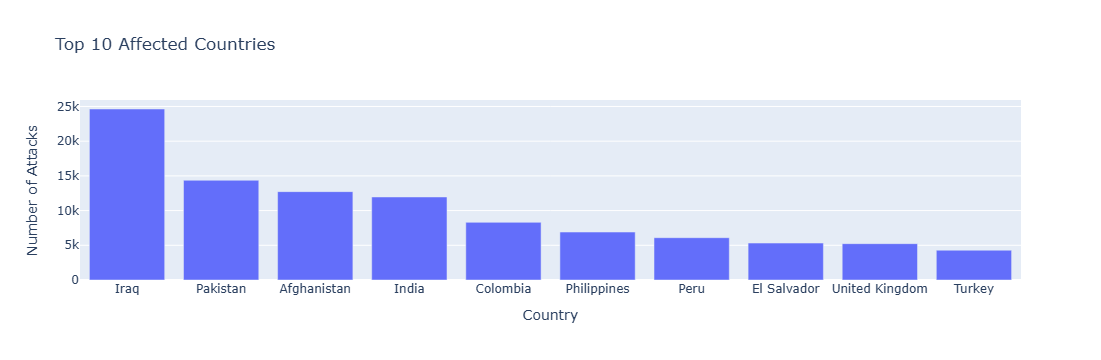

In [170]:
# Top countries plot
import plotly.graph_objects as go

top_countries = data["Country"].value_counts().head(10)
fig1 = go.Figure([go.Bar(x=top_countries.index, y=top_countries.values)])
fig1.update_layout(
    title="Top 10 Affected Countries", 
    xaxis_title="Country", 
    yaxis_title="Number of Attacks"
)
fig1.show()

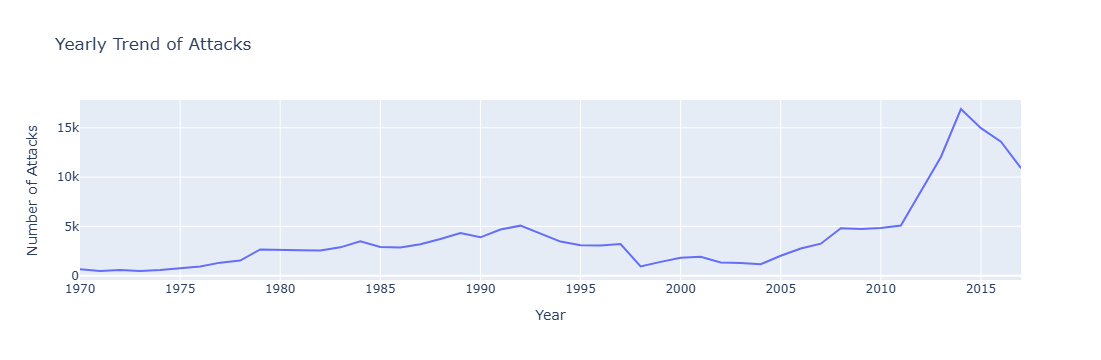

In [171]:
# Yearly attacks trend
yearly_attacks = data.groupby("Year").size()
fig2 = go.Figure([go.Scatter(x=yearly_attacks.index, y=yearly_attacks.values, mode="lines")])
fig2.update_layout(
    title="Yearly Trend of Attacks", 
    xaxis_title="Year", 
    yaxis_title="Number of Attacks"
)
fig2.show()

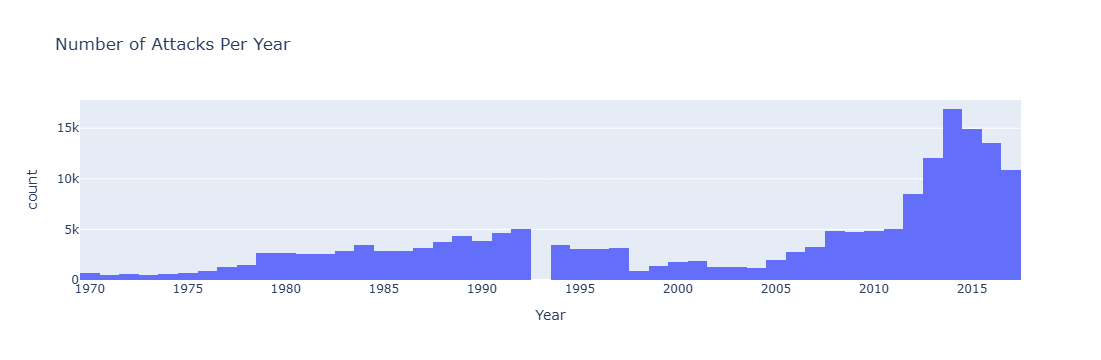

In [172]:
# Attacks per year histogram
import plotly.express as px
fig3 = px.histogram(data, x="Year", title="Number of Attacks Per Year")
fig3.show()

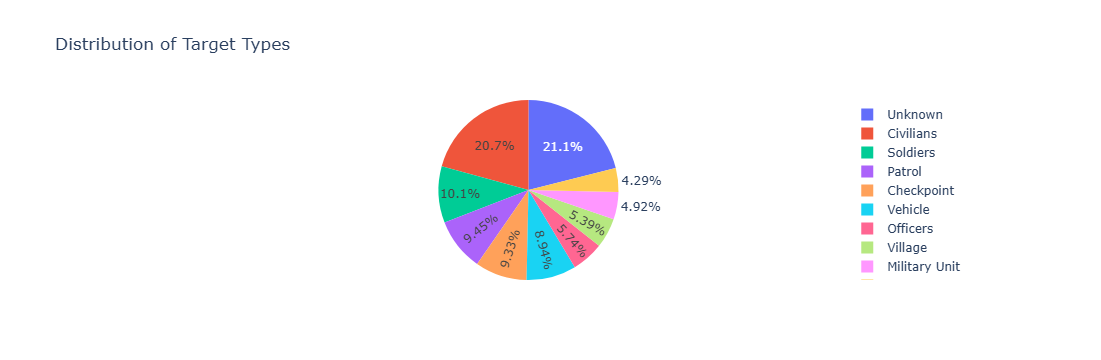

In [173]:
# Target types pie chart
target_types = data["Target"].value_counts().head(10)
fig4 = px.pie(values=target_types.values, names=target_types.index, title="Distribution of Target Types")
fig4.show()

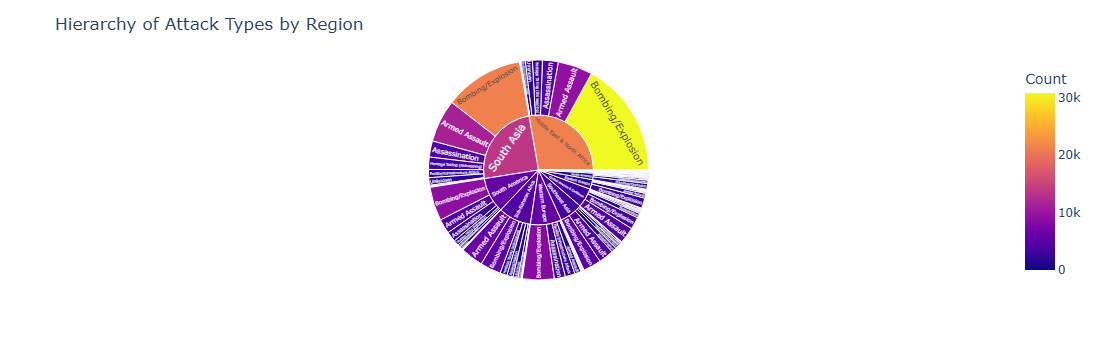

In [174]:
# Region vs AttackType sunburst chart
grouped_data = data.groupby(['Region', 'AttackType']).size().reset_index(name='Count')
fig5 = px.sunburst(grouped_data, path=['Region', 'AttackType'], values='Count', color='Count')
fig5.update_layout(title='Hierarchy of Attack Types by Region')
fig5.show()

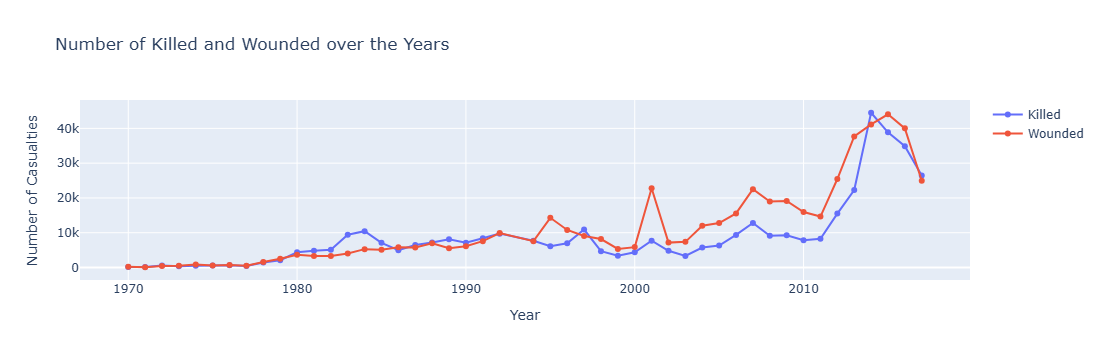

In [175]:
# Number of Killed and Wounded over the years
year_killed_wounded = data.groupby('Year')[['Killed', 'Wounded']].sum().reset_index()
fig6 = go.Figure()
fig6.add_trace(go.Scatter(x=year_killed_wounded['Year'], y=year_killed_wounded['Killed'], mode='lines+markers', name='Killed'))
fig6.add_trace(go.Scatter(x=year_killed_wounded['Year'], y=year_killed_wounded['Wounded'], mode='lines+markers', name='Wounded'))
fig6.update_layout(
    title="Number of Killed and Wounded over the Years", 
    xaxis_title="Year", 
    yaxis_title="Number of Casualties"
)
fig6.show()

In [176]:
#Terrorist groups active in india


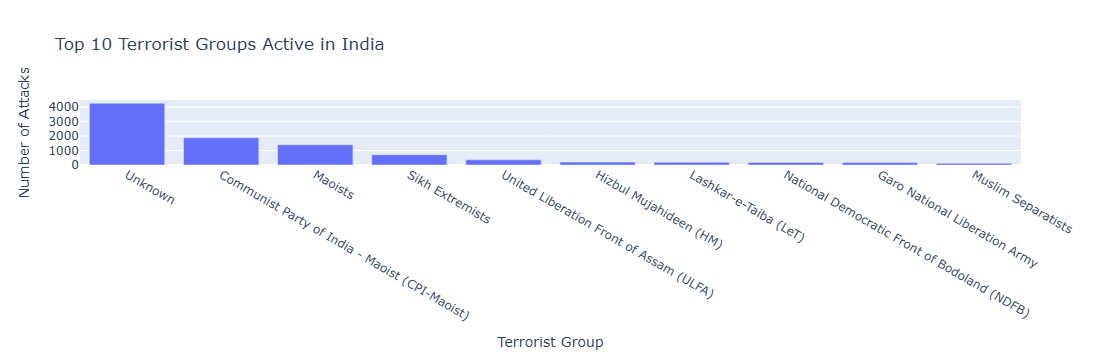

In [177]:
india_data = data[data['Country'] == 'India']
region_counts = india_data['Region'].value_counts()
india_active_groups = india_data['Group'].value_counts().head(10)
fig7 = go.Figure([go.Bar(x=india_active_groups.index, y=india_active_groups.values)])
fig7.update_layout(title="Top 10 Terrorist Groups Active in India", xaxis_title="Terrorist Group", yaxis_title="Number of Attacks")
fig7.show()

**Impact of Terrorism on Indian Infrastructure


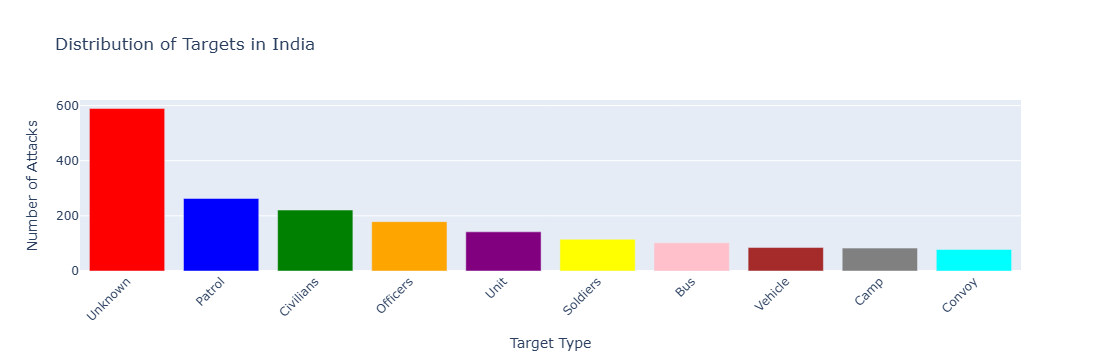

In [178]:
import plotly.graph_objects as go

# Calculate the top 10 target types in India
india_target_types = india_data['Target'].value_counts().head(10)

# Define a list of colors for the bars
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan']

# Create the bar chart
fig8 = go.Figure(
    [go.Bar(
        x=india_target_types.index, 
        y=india_target_types.values, 
        marker=dict(color=colors)  # Assign different colors to each bar
    )]
)

# Update the layout with titles and styling
fig8.update_layout(
    title="Distribution of Targets in India",
    xaxis_title="Target Type",
    yaxis_title="Number of Attacks",
    #template="plotly_dark",  # Optional: dark theme
    xaxis=dict(tickangle=-45)  # Rotate x-axis labels if needed
)

# Show the chart
fig8.show()


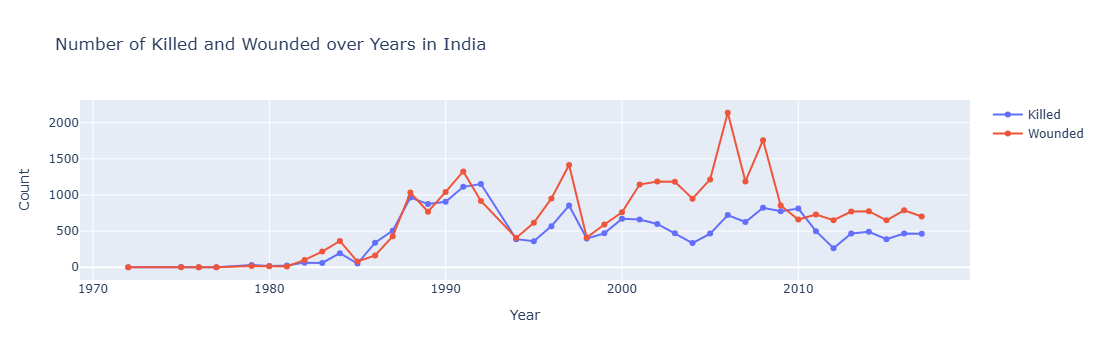

In [179]:
india_data = data[data['Country'] == 'India']

# Group by 'Year' and calculate the sum of 'Killed' and 'Wounded'
year_killed_wounded = india_data.groupby('Year')[['Killed', 'Wounded']].sum().reset_index()

# Create the plot
import plotly.graph_objects as go

fig9 = go.Figure()
fig9.add_trace(go.Scatter(x=year_killed_wounded['Year'], y=year_killed_wounded['Killed'], 
                          mode='lines+markers', name='Killed'))
fig9.add_trace(go.Scatter(x=year_killed_wounded['Year'], y=year_killed_wounded['Wounded'], 
                          mode='lines+markers', name='Wounded'))

fig9.update_layout(title='Number of Killed and Wounded over Years in India',
                   xaxis_title='Year',
                   yaxis_title='Count',
                   #template='plotly_dark'
                  )
fig9.show()

** DASHBOARD CREATION

In [180]:
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc
import webbrowser

# Initialize Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP]) #initialize bootstrap

# Define the layout of the dashboard
app.layout = dbc.Container([
    # Title
    dbc.Row([
        dbc.Col(html.H1("World Terrorism Data Dashboard", className="text-center my-4"), width=12)
    ]),

    # Row 1: Top countries and yearly trend
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Top 10 Affected Countries", className="text-center"),
                dbc.CardBody(dcc.Graph(figure=fig1))
            ], className="mb-4")
        ], width=6),

        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Yearly Trend of Attacks", className="text-center"),
                dbc.CardBody(dcc.Graph(figure=fig2))
            ], className="mb-4")
             ], width=6),
    ]),

    # Row 2: Attacks per year and target distribution
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Number of Attacks Per Year", className="text-center"),
                dbc.CardBody(dcc.Graph(figure=fig3))
            ], className="mb-4")
        ], width=6),

        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Distribution of Target Types", className="text-center"),
                dbc.CardBody(dcc.Graph(figure=fig4))
            ], className="mb-4")
        ], width=6),
    ]),

    # Row 3: Attacks by region
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Number of Attacks by Region", className="text-center"),
                dbc.CardBody(dcc.Graph(figure=fig5))
            ], className="mb-4")
        ], width=12),
    ]),

    # Row 4: Killed and Wounded line plot
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Number of Killed and Wounded over the Years", className="text-center"),
                dbc.CardBody(dcc.Graph(figure=fig6))
            ], className="mb-4")
        ], width=12),
    ]),
    # Row 5: Impact on INDIA
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Top 10 Terrorist Groups Active in India", className="text-center"),
                dbc.CardBody(dcc.Graph(figure=fig7))
            ], className="mb-4")
        ], width=4),

        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Distribution of Targets in India", className="text-center"),
                dbc.CardBody(dcc.Graph(figure=fig8))
            ], className="mb-4")
             ], width=4),
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Number of Killed and Wounded over Years in India ", className="text-center"),
                
                dbc.CardBody(dcc.Graph(figure=fig9))
            ], className="mb-4")
             ], width=4),
    ]),
], fluid=True)



# Open the dashboard in a browser
if __name__ == '__main__':
    webbrowser.open("http://127.0.0.1:8052/")  
    app.run_server(debug=False , port=8052)